In [1]:
!pip install pandas_datareader

In [2]:
!pip install yfinance

In [3]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
from datetime import datetime

In [4]:
yf.pdr_override()
df = pdr.get_data_yahoo('TSLA')

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700
2023-08-29,238.580002,257.480011,237.770004,257.179993,257.179993,134047600
2023-08-30,254.199997,260.510010,250.589996,256.899994,256.899994,121988400


<AxesSubplot:xlabel='Date'>

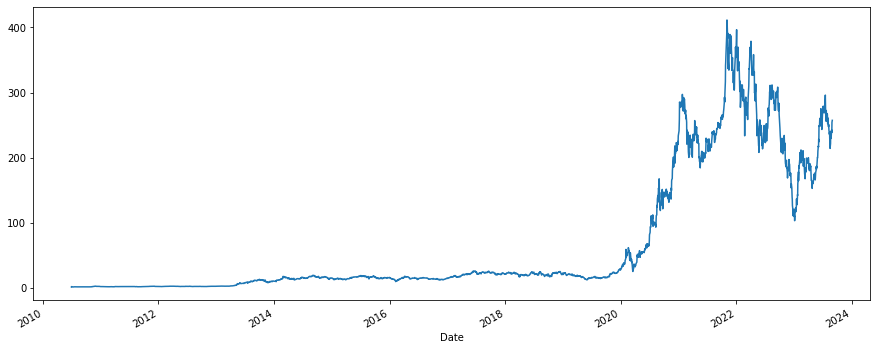

In [6]:
df['Open'].plot(figsize=(15,6))

#### Simeple Moving Average(SMA)
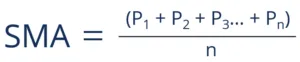

In [7]:
df['Open:10 days rolling'] = df['Open'].rolling(window=10,min_periods=1).mean()

In [8]:
df['Open:10 days rolling']

Date
2010-06-29      1.266667
2010-06-30      1.493000
2010-07-01      1.550889
2010-07-02      1.546500
2010-07-06      1.503867
                 ...    
2023-08-28    231.062000
2023-08-29    231.047000
2023-08-30    233.664999
2023-08-31    236.656999
2023-09-01    240.971001
Name: Open:10 days rolling, Length: 3318, dtype: float64

<AxesSubplot:xlabel='Date'>

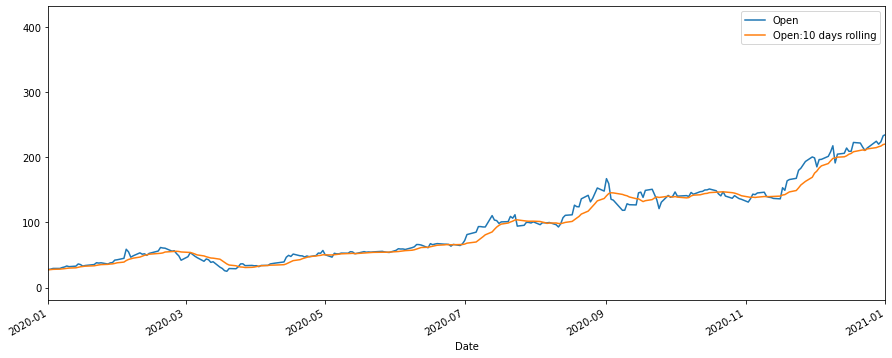

In [9]:
df[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [10]:
df['Open:30 days rolling'] = df['Open'].rolling(window=30,min_periods=1).mean()
df['Open:50 days rolling'] = df['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

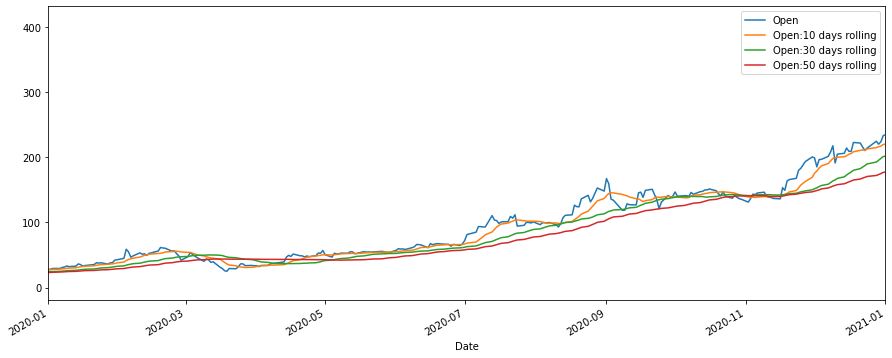

In [11]:
df[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

#### Cumulative Moving Average(CMA)

In [12]:
df['Open:cumulative'] = df['Open'].expanding().mean()
df['Open:cumulative']

Date
2010-06-29     1.266667
2010-06-30     1.493000
2010-07-01     1.550889
2010-07-02     1.546500
2010-07-06     1.503867
                ...    
2023-08-28    66.027157
2023-08-29    66.079209
2023-08-30    66.135940
2023-08-31    66.193174
2023-09-01    66.250759
Name: Open:cumulative, Length: 3318, dtype: float64

<AxesSubplot:xlabel='Date'>

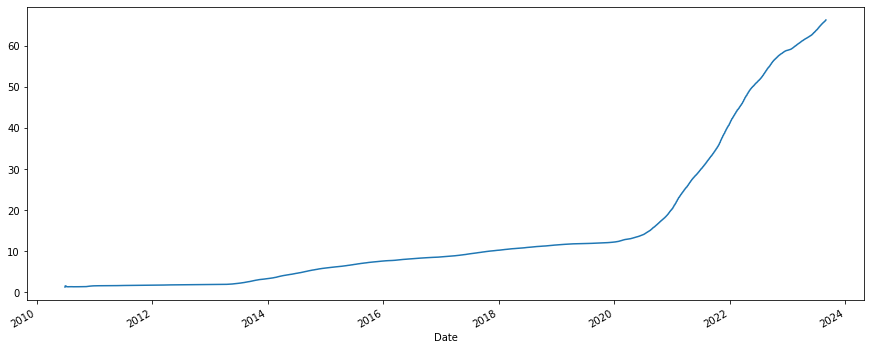

In [13]:
df['Open:cumulative'].plot(figsize=(15,6))

#### Exponential Moving Average(EMA)

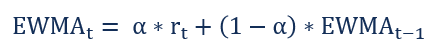

It also called Exponential Weighted Moving Average(EWMA)

(Closing Price – EMA of the previous day) * multiplier + EMA of the previous day.

multiplier = 2/(window+1)

For 1 record after window size, calculate SMA for considering previous EMA for next record.

In [14]:
# smothning factor(alpha) - 0.1
df['EMA_0.1'] = df['Open'].ewm(alpha=0.1,adjust=False).mean()
df['EMA_0.1']

Date
2010-06-29      1.266667
2010-06-30      1.311934
2010-07-01      1.347407
2010-07-02      1.366000
2010-07-06      1.362733
                 ...    
2023-08-28    240.264659
2023-08-29    240.096194
2023-08-30    241.506574
2023-08-31    242.953916
2023-09-01    244.384526
Name: EMA_0.1, Length: 3318, dtype: float64

<AxesSubplot:xlabel='Date'>

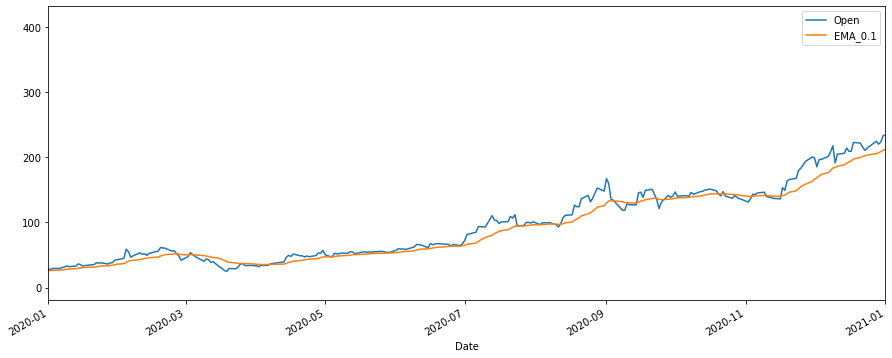

In [15]:
df[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [16]:
df['EMA_0.3'] = df['Open'].ewm(alpha=0.3,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

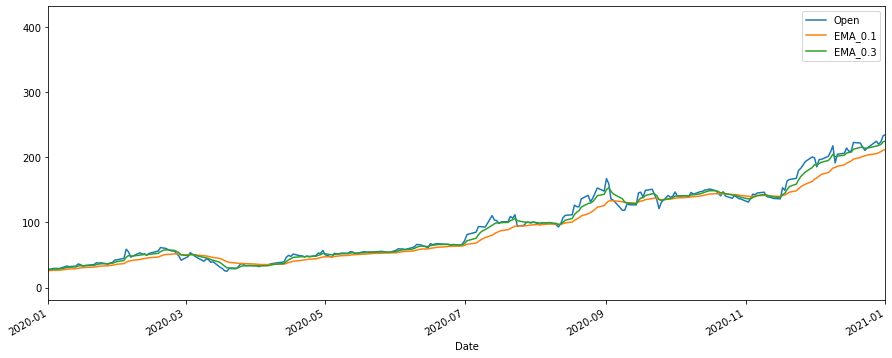

In [17]:
df[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [18]:
df['EMA_5days'] = df['Open'].ewm(span=5,adjust=True).mean()

<AxesSubplot:xlabel='Date'>

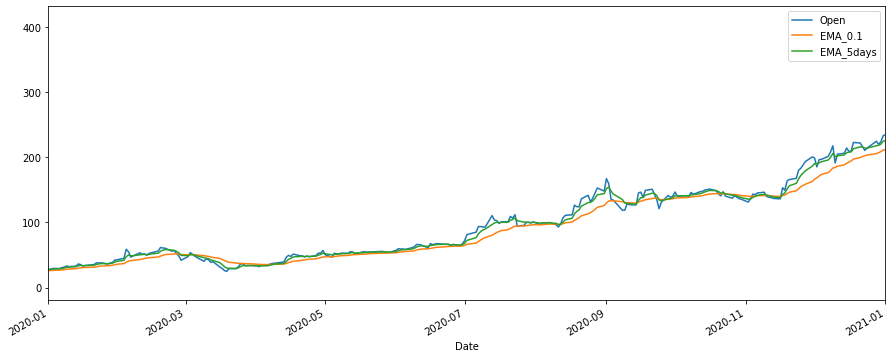

In [19]:
df[['Open','EMA_0.1','EMA_5days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

## Time-Series Models

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [21]:
df_airline = pd.read_csv('Airlinedataset/airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [22]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [23]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [24]:
df_airline.dropna(axis=0,inplace=True)

In [25]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [26]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [27]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [28]:
df_airline.set_index('Month',inplace=True)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

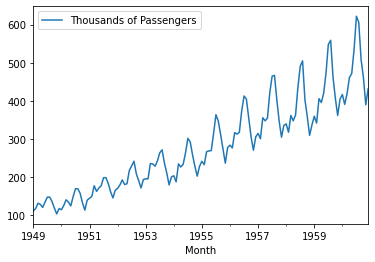

In [29]:
df_airline.plot()

#### Dickey Fuller Test

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and it is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [32]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060463
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [33]:
# Use Techniques Differencing
df_airline['Passengers First Difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [34]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [35]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699923
p- value: 0.054213290283826474
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [36]:
df_airline['Passengers Second Difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(2)
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,20.0
1949-04-01,129.0,-3.0,11.0
1949-05-01,121.0,-8.0,-11.0


In [37]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -2.961695135555423
p- value: 0.038629757676988535
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and it is stationary


In [38]:
df_airline['Passengers 12 Difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514954
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and it is stationary


#### 
1. acf - auto co-relation (find q value - Moving Average)   
2. pacf - partial auto co-relation (find p value - Auto Regression)
3. (d - diffrence) 
4. (s - season(months))
4. ARIMA - Parameters (p,d,q)
5. SARIMAX - Parameters (p,d,q,s)

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

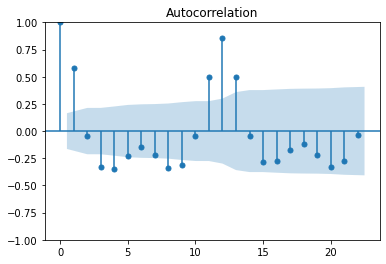

In [40]:
acf2 = plot_acf(df_airline["Passengers Second Difference"].dropna())

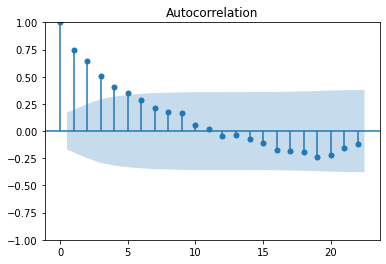

In [41]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())

C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


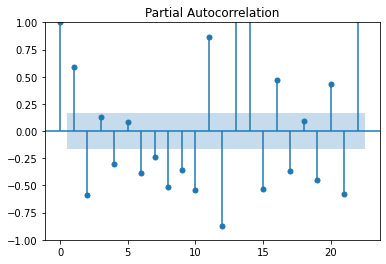

In [42]:
pacf2 = plot_pacf(df_airline["Passengers Second Difference"].dropna())

C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


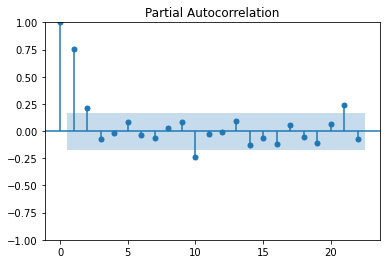

In [43]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [44]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,20.0,NaN
1949-04-01,129.0,-3.0,11.0,NaN
1949-05-01,121.0,-8.0,-11.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,71.0,47.0
1960-09-01,508.0,-98.0,-114.0,45.0
1960-10-01,461.0,-47.0,-145.0,54.0


In [45]:
# split train and test data
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [46]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [47]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,20.0,NaN
1949-04-01,129.0,-3.0,11.0,NaN
1949-05-01,121.0,-8.0,-11.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,32.0,54.0
1955-09-01,312.0,-35.0,-52.0,53.0
1955-10-01,274.0,-38.0,-73.0,45.0


In [48]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,47.0,42.0
1956-02-01,277.0,-7.0,-1.0,44.0
1956-03-01,317.0,40.0,33.0,50.0
1956-04-01,313.0,-4.0,36.0,44.0
1956-05-01,318.0,5.0,1.0,48.0
1956-06-01,374.0,56.0,61.0,59.0
1956-07-01,413.0,39.0,95.0,49.0
1956-08-01,405.0,-8.0,31.0,58.0
1956-09-01,355.0,-50.0,-58.0,43.0


In [49]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [50]:
pred_start_date

Timestamp('1956-01-01 00:00:00')

In [51]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

### 1. ARIMA Model

In [52]:
from statsmodels.tsa.arima.model import ARIMA

In [53]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
model_Arima_fit = model_ARIMA.fit()

In [55]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Sat, 02 Sep 2023   AIC                            736.477
Time:                             16:40:44   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [57]:
pred_Arima = model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred_Arima

In [58]:
pred_Arima.head()

1956-01-01    300.183612
1956-02-01    309.478354
1956-03-01    316.443013
1956-04-01    307.827542
1956-05-01    318.544231
Freq: MS, Name: predicted_mean, dtype: float64

In [59]:
residuals.head()

Month
1956-01-01   -16.183612
1956-02-01   -32.478354
1956-03-01     0.556987
1956-04-01     5.172458
1956-05-01    -0.544231
dtype: float64

<AxesSubplot:ylabel='Density'>

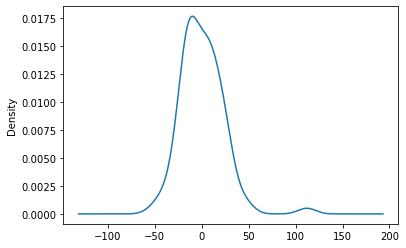

In [60]:
model_Arima_fit.resid.plot(kind='kde')

In [61]:
test_data['Predicted_ARIMA'] = pred_Arima

C:\Users\user\AppData\Local\Temp\ipykernel_11116\2957868244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred_Arima


In [62]:
test_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,47.0,42.0,300.183612
1956-02-01,277.0,-7.0,-1.0,44.0,309.478354
1956-03-01,317.0,40.0,33.0,50.0,316.443013
1956-04-01,313.0,-4.0,36.0,44.0,307.827542
1956-05-01,318.0,5.0,1.0,48.0,318.544231


<AxesSubplot:xlabel='Month'>

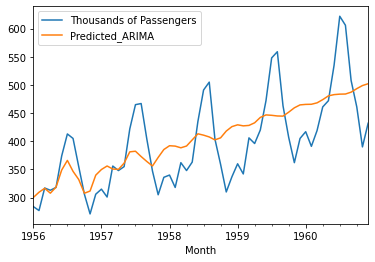

In [63]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

### 2. SARIMAX Model

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [65]:
model_SARIMA = SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sat, 02 Sep 2023   AIC                            548.481
Time:                                     16:40:47   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5989      0.938      0.638      0.523      -1.240       2.438
ar.L2          0.8312      0.232      3.579      0.000       0.376       1.286
ar.L3         -0.4532      0.894     -0.507      0.612      -2.206       1.300
ma.L1          0.1832      1.166      0.157      0.875      -2.101       2.468
ma.L2         -0.5348      1.264     -0.423      0.672      -3.011       1.942
ma.L3         -0.0986      0.385     -0.256      0.798      -0.852       0.655
ma.L4         -0.1272      0.338     -0.377      0.706      -0.789       0.535
ma.L5          0.2471      0.357      0.692      0.489      -0.452       0.947
sigma2        87.7265     81.225      1.080      0.280     -71.473     246.926
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
pred_Sarima = model_SARIMA_fit.predict(start=datetime(1956,1,1),end=datetime(1960,12,1))
residuals = test_data['Thousands of Passengers']-pred_Sarima

In [69]:
pred_Sarima

1956-01-01    286.187814
1956-02-01    281.278925
1956-03-01    309.919618
1956-04-01    310.680057
1956-05-01    311.336491
1956-06-01    354.952013
1956-07-01    403.399007
1956-08-01    385.072694
1956-09-01    349.446099
1956-10-01    310.218973
1956-11-01    272.564253
1956-12-01    312.436077
1957-01-01    319.960106
1957-02-01    314.012605
1957-03-01    341.990777
1957-04-01    341.791919
1957-05-01    341.793794
1957-06-01    384.520145
1957-07-01    432.325253
1957-08-01    413.172040
1957-09-01    376.919610
1957-10-01    336.921215
1957-11-01    298.659099
1957-12-01    337.809665
1958-01-01    344.746366
1958-02-01    338.122841
1958-03-01    365.534794
1958-04-01    364.701058
1958-05-01    364.158404
1958-06-01    406.287504
1958-07-01    453.570000
1958-08-01    433.854109
1958-09-01    397.100940
1958-10-01    356.571772
1958-11-01    317.830539
1958-12-01    356.479891
1959-01-01    362.958690
1959-02-01    355.861429
1959-03-01    382.836177
1959-04-01    381.554325


In [70]:
residuals

Month
1956-01-01     -2.187814
1956-02-01     -4.278925
1956-03-01      7.080382
1956-04-01      2.319943
1956-05-01      6.663509
1956-06-01     19.047987
1956-07-01      9.600993
1956-08-01     19.927306
1956-09-01      5.553901
1956-10-01     -4.218973
1956-11-01     -1.564253
1956-12-01     -6.436077
1957-01-01     -4.960106
1957-02-01    -13.012605
1957-03-01     14.009223
1957-04-01      6.208081
1957-05-01     13.206206
1957-06-01     37.479855
1957-07-01     32.674747
1957-08-01     53.827960
1957-09-01     27.080390
1957-10-01     10.078785
1957-11-01      6.340901
1957-12-01     -1.809665
1958-01-01     -4.746366
1958-02-01    -20.122841
1958-03-01     -3.534794
1958-04-01    -16.701058
1958-05-01     -1.158404
1958-06-01     28.712496
1958-07-01     37.430000
1958-08-01     71.145891
1958-09-01      6.899060
1958-10-01      2.428228
1958-11-01     -7.830539
1958-12-01    -19.479891
1959-01-01     -2.958690
1959-02-01    -13.861429
1959-03-01     23.163823
1959-04-01     14.4

<AxesSubplot:xlabel='Month'>

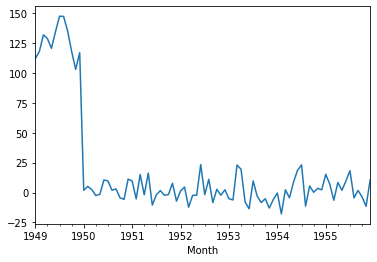

In [71]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

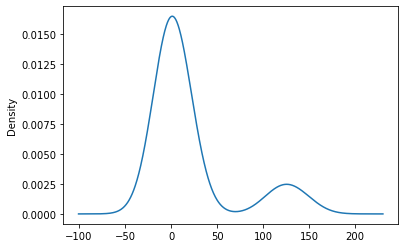

In [72]:
model_SARIMA_fit.resid.plot(kind='kde')

In [73]:
test_data['Predicted_SARIMAX'] = pred_Sarima

C:\Users\user\AppData\Local\Temp\ipykernel_11116\3442192086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMAX'] = pred_Sarima


In [74]:
test_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMAX
Month,,,,,,
1956-01-01,284.0,6.0,47.0,42.0,300.183612,286.187814
1956-02-01,277.0,-7.0,-1.0,44.0,309.478354,281.278925
1956-03-01,317.0,40.0,33.0,50.0,316.443013,309.919618
1956-04-01,313.0,-4.0,36.0,44.0,307.827542,310.680057
1956-05-01,318.0,5.0,1.0,48.0,318.544231,311.336491


<AxesSubplot:xlabel='Month'>

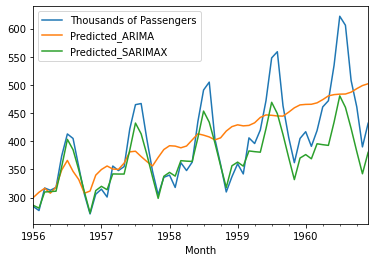

In [75]:
test_data[['Thousands of Passengers','Predicted_ARIMA','Predicted_SARIMAX']].plot()

### Note:- SARIMAX model is better than ARIMA model.